In [1]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

/home/workstation2/anaconda3/envs/spearmint/lib/python2.7/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
opt_val = 0

### Connecting MongoDB server

In [3]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

[u'admin', u'config', u'local', u'spearmint']

In [4]:
mongo_db = mongo_conn['spearmint']

In [5]:
mongo_db.list_collection_names()

[u'levy_2-68.recommendations',
 u'levy_1-60.recommendations',
 u'levyN13_1-71.start-time',
 u'levy_2-43.jobs',
 u'levy_4-38.jobs',
 u'levyN13_1-73.start-time',
 u'levyN13_1-82.start-time',
 u'levy_1-74.recommendations',
 u'levy_4-60.hypers',
 u'levyN13_1-88.jobs',
 u'levyN13_1-2.recommendations',
 u'levy_2-22.start-time',
 u'levy_2-42.jobs',
 u'levyN13_1-14.jobs',
 u'levy_2-85.hypers',
 u'levy_2-17.jobs',
 u'levy_1-3.hypers',
 u'levyN13_1-36.jobs',
 u'levyN13_1-14.hypers',
 u'levyN13_1-88.hypers',
 u'levy_1-56.recommendations',
 u'levy_1-87.recommendations',
 u'levy_1-91.hypers',
 u'levy_4-55.hypers',
 u'levy_2-90.hypers',
 u'levy_4-50.start-time',
 u'levy_4-36.recommendations',
 u'levy_1-79.jobs',
 u'levy_2-75.hypers',
 u'levy_4-1.recommendations',
 u'levyN13_1-42.start-time',
 u'levy_1-59.jobs',
 u'levy_2-93.start-time',
 u'levyN13_1-68.jobs',
 u'levyN13_1-50.recommendations',
 u'levy_2-86.recommendations',
 u'levy_2-74.jobs',
 u'levy_2-54.recommendations',
 u'levy_2-53.jobs',
 u'lev

### Loading document from database

In [11]:
jobs1_exp = []
jobs2_exp = []
jobs3_exp = []
jobs4_exp = []

recomm1_exp = []
recomm2_exp = []
recomm3_exp = []
recomm4_exp = []

for i in range(100):
    jobs1_exp.append(mongo_db["levy_1-%d.jobs"%i])
    jobs2_exp.append(mongo_db["levy_2-%d.jobs"%i])
    #jobs3_exp.append(mongo_db["levy_3-%d.jobs"%i])
    jobs4_exp.append(mongo_db["levy_4-%d.jobs"%i])
    
    recomm1_exp.append(mongo_db["levy_1-%d.recommendations"%i])
    recomm2_exp.append(mongo_db["levy_2-%d.recommendations"%i])
    #recomm3_exp.append(mongo_db["levy_3-%d.recommendations"%i])
    recomm4_exp.append(mongo_db["levy_4-%d.recommendations"%i])

In [12]:
levy1_objs = functions.get_objective(recomm1_exp)
levy2_objs = functions.get_objective(recomm2_exp)
#levy3_objs = functions.get_objective(recomm3_exp)
levy4_objs = functions.get_objective(recomm4_exp)

In [13]:
levy1_objs = np.average(levy1_objs, axis = 0)
levy2_objs = np.average(levy2_objs, axis = 0)
levy4_objs = np.average(levy4_objs, axis = 0)
#levy3_objs = np.average(levy3_objs, axis = 0)


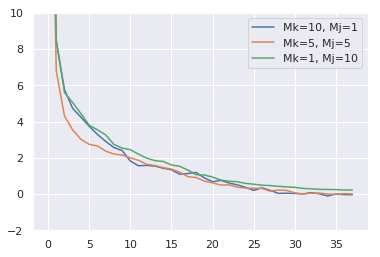

In [17]:
plt.plot(levy1_objs[:-2], label = 'Mk=10, Mj=1')
plt.plot(levy2_objs[:-2], label = 'Mk=5, Mj=5')
plt.plot(levy4_objs[:-2], label = 'Mk=1, Mj=10')
plt.ylim(-2,10)
plt.legend()

### Getting immediate Regret IR measure

In [18]:
def levy_4d(x1,x2,x3,x4):
	w1 = 1 + (x1-1)/4
	w2 = 1 + (x2-1)/4
	w3 = 1 + (x3-1)/4
	w4 = 1 + (x4-1)/4

	a = np.sin(np.pi * w1)**2
	b = ((w1-1)**2)*(1+10*(np.sin(np.pi*w1+1)**2)) + ((w2-1)**2)*(1+10*(np.sin(np.pi*w2+1)**2)) + ((w3-1)**2)*(1+10*(np.sin(np.pi*w3+1)**2)) 
	c = ((w4-1)**2) * (1 + (np.sin(2*np.pi*w4)**2))

	result = a + b + c

	return result

In [19]:
def log_ir(input_list):
    return np.log10(np.abs(opt_val - levy_4d(*input_list)))

In [20]:
def get_irs_whole_exp(locs_exp):
    irs_exp = []
    for exp_num in range(len(locs_exp)):
        irs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for locs in locs_cur_exp:
            irs_iter.append(log_ir(locs))
            
        irs_exp.append(irs_iter)
        
    return irs_exp

In [21]:
def get_avg_irs(irs_exp):
    avg_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs


In [22]:
def get_avg_irs2(irs_exp):
    avg_irs = []
    for iter_num in range(50):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs



In [23]:
def get_median_irs(irs_exp):
    median_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs



In [24]:
def get_median_irs2(irs_exp):
    median_irs = []
    for iter_num in range(50):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs



In [25]:
locs1_exp = functions.get_recomm(recomm1_exp)
locs2_exp = functions.get_recomm(recomm2_exp)
#locs3_exp = functions.get_recomm(recomm3_exp)
locs4_exp = functions.get_recomm(recomm4_exp)


In [26]:
irs1_exp = get_irs_whole_exp(locs1_exp)
irs2_exp = get_irs_whole_exp(locs2_exp)
#irs3_exp = get_irs_whole_exp(locs3_exp)
irs4_exp = get_irs_whole_exp(locs4_exp)

In [27]:
irs1_median = get_median_irs(irs1_exp)
irs2_median = get_median_irs(irs2_exp)
#irs3_median = get_median_irs(irs3_exp)
irs4_median = get_median_irs(irs4_exp)

In [28]:
irs1_avg = get_avg_irs(irs1_exp)
irs2_avg = get_avg_irs(irs2_exp)
#irs3_avg = get_avg_irs(irs3_exp)
irs4_avg = get_avg_irs(irs4_exp)

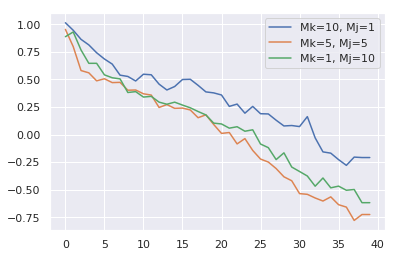

In [29]:
plt.plot(irs1_median,label='Mk=10, Mj=1')
plt.plot(irs2_median,label='Mk=5, Mj=5')
#plt.plot(irs3_median,label='Mk=1, Mj=1')
plt.plot(irs4_median,label='Mk=1, Mj=10')
plt.legend()



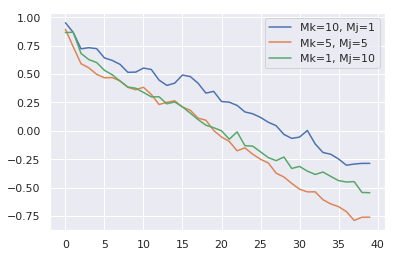

In [30]:
plt.plot(irs1_avg,label='Mk=10, Mj=1')
plt.plot(irs2_avg,label='Mk=5, Mj=5')
#plt.plot(irs3_avg,label='Mk=1, Mj=1')
plt.plot(irs4_avg,label='Mk=1, Mj=10')
plt.legend()
